## Introduction

Food magazine Bon Appetit is known for focusing on what's current and stylish in the world of food and entertaining. This is why I'm curious to learn about the ingredients that are featured in its recipes and how they have changed over the years.

In [1]:
# import necessary pacakages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
recipes = pd.read_pickle("recipes_processed.pkl")

## Trends in ingredients

In [3]:
recipes.iloc[:, np.r_[2,12:616]].groupby(recipes.date_x.dt.year.astype('Int64')).size()

date_x
2012      8
2013     53
2014    646
2015    625
2016    555
2017    618
2018    476
2019    370
2020    300
2021     62
dtype: int64

Since the number of recipes varies widely over the years, the popularity of ingredients is better shown through the percentage of recipes the ingredient is featured in.

In [4]:
# group by year, sum the binary columns, divide it by the number of rows in each group to get the proportion
ingred_prop = recipes.iloc[:, np.r_[2,12:616]].groupby(recipes.date_x.dt.year.astype('Int64')).apply(lambda x:(100*x.sum())/len(x))

# drop 2012, 2013, 2021 since they only has 8, 53, 62 recipes respectively
ingred_prop = ingred_prop.drop([2012, 2013, 2021])
ingred_prop

,udon,absinthe,acai,achiote paste,acorn squash,adobo,agave,aioli,aleppo pepper,allspice,...,whole wheat,wild rice,worcestershire sauce,yam,yeast,yogurt,yukon gold,yuzu,ziti,zucchini
date_x,,,,,,,,,,,,,,,,,,,,,
2014,0.154799,0.000000,0.000000,0.000000,0.154799,0.773994,1.238390,0.154799,2.012384,1.238390,...,0.154799,0.154799,0.773994,0.000000,1.547988,2.786378,2.321981,0.154799,0.000000,0.773994
2015,0.000000,0.160000,0.000000,0.000000,0.160000,0.800000,0.640000,0.320000,2.240000,0.960000,...,1.120000,0.320000,1.120000,0.000000,1.760000,3.040000,2.080000,0.000000,0.000000,1.280000
2016,0.180180,0.180180,0.000000,0.000000,0.180180,0.000000,2.162162,0.540541,0.000000,0.900901,...,1.441441,0.180180,0.720721,0.180180,2.162162,2.342342,1.801802,0.540541,0.000000,0.540541
2017,0.323625,0.000000,0.161812,0.000000,0.485437,0.323625,1.294498,0.161812,0.000000,0.809061,...,1.618123,0.161812,1.618123,0.323625,2.103560,2.750809,1.132686,0.323625,0.000000,1.132686
2018,0.210084,0.000000,0.000000,0.000000,0.420168,1.050420,0.630252,0.420168,0.000000,1.260504,...,1.470588,0.210084,0.630252,0.000000,0.840336,4.201681,0.840336,0.000000,0.210084,1.050420
2019,0.000000,0.000000,0.000000,0.000000,0.810811,0.810811,1.081081,0.540541,0.000000,0.810811,...,1.621622,0.000000,0.810811,0.270270,1.351351,2.972973,2.162162,0.000000,0.000000,1.621622
2020,0.333333,0.333333,0.000000,0.333333,0.333333,2.000000,1.333333,0.333333,0.000000,3.000000,...,2.333333,0.000000,2.666667,0.000000,3.333333,6.000000,2.666667,0.000000,0.333333,0.666667


604 ingredients far too many to plot on a single graph. So I'll look at the ingredients which have been featured in at least one recipe every year.

In [5]:
ingred_prop[ingred_prop.columns[(ingred_prop>0).all()]]

,acorn squash,agave,aioli,allspice,almond,ancho chile,anchovy,apple,apple cider,arugula,...,watermelon,whipped cream,white wine,whole grain,whole wheat,worcestershire sauce,yeast,yogurt,yukon gold,zucchini
date_x,,,,,,,,,,,,,,,,,,,,,
2014,0.154799,1.238390,0.154799,1.238390,3.715170,0.928793,2.631579,2.476780,4.334365,2.476780,...,0.928793,0.619195,9.133127,2.786378,0.154799,0.773994,1.547988,2.786378,2.321981,0.773994
2015,0.160000,0.640000,0.320000,0.960000,4.800000,0.800000,2.080000,3.040000,6.080000,1.920000,...,0.960000,0.800000,11.840000,1.280000,1.120000,1.120000,1.760000,3.040000,2.080000,1.280000
2016,0.180180,2.162162,0.540541,0.900901,4.864865,1.261261,2.342342,3.243243,4.864865,1.801802,...,1.261261,0.900901,7.927928,1.801802,1.441441,0.720721,2.162162,2.342342,1.801802,0.540541
2017,0.485437,1.294498,0.161812,0.809061,7.443366,0.809061,1.294498,1.779935,3.236246,1.456311,...,0.809061,0.323625,7.443366,2.103560,1.618123,1.618123,2.103560,2.750809,1.132686,1.132686
2018,0.420168,0.630252,0.420168,1.260504,3.361345,0.840336,1.890756,2.941176,3.151261,1.470588,...,0.420168,0.420168,7.563025,1.890756,1.470588,0.630252,0.840336,4.201681,0.840336,1.050420
2019,0.810811,1.081081,0.540541,0.810811,4.324324,1.351351,2.702703,1.891892,3.243243,1.351351,...,0.810811,2.702703,7.297297,0.540541,1.621622,0.810811,1.351351,2.972973,2.162162,1.621622
2020,0.333333,1.333333,0.333333,3.000000,3.000000,1.000000,1.000000,1.000000,5.000000,1.333333,...,1.666667,0.333333,5.666667,0.666667,2.333333,2.666667,3.333333,6.000000,2.666667,0.666667


There are 269 columns which are featured at least one recipe every year between 2014 and 2020. This number is still far too large to be plotted on a single graph. So I'll split the ingredients up into smaller groups based on their proportion.

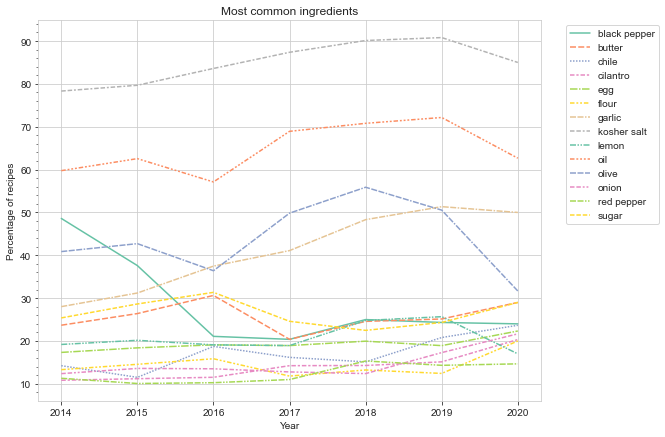

In [9]:
# plot only column where all values >10% in a line graph where x is the year
import matplotlib.ticker as ticker
sns.set_style("whitegrid")
plt.rcParams.update({"xtick.bottom" : True, "ytick.left" : True}) #turn on minor ticks for y axis
fig, ax = plt.subplots(figsize=(9,7))

sns.lineplot(data=ingred_prop[ingred_prop.columns[(ingred_prop>10).all()]], ax=ax, palette='Set2')

ax.set(xlabel='Year', ylabel='Percentage of recipes')
ax.set_title('Most common ingredients')

ax.yaxis.set_minor_locator(ticker.AutoMinorLocator()) # sets the minor ticks dynamically given the position of the major ticks

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left") # place legend outside of the plot
plt.show()

It's no surprise (perhaps except for cilantro) that these ingredients are featured in >10% of recipes every year since they are pantry staples and form the 'base' of many dishes.  


What's more interesting to examine is the less basic ingredients. Given that there are a large number of ingredients, I'll use my own knowledge to create categories of ingredients whose popularity I can compare, such as green vegetables, fruit, herbs, spices, pasta shapes, cheeses, etc.

In [12]:
# define a function that takes in a list of column names and generates plots from them

def plot_ingred_trend(my_df, my_list, my_category):
    """This function takes as arugments: a df containing the proportions of recipes containing a certain ingredient,
       a list of column names of select ingredients and the category the representing the ingredients.
    """
    import matplotlib.ticker as ticker

    sns.set_style("whitegrid")
    plt.rcParams.update({"xtick.bottom" : True, "ytick.left" : True}) #turn on minor ticks for y axis
    fig, ax = plt.subplots(figsize=(8,6))

    sns.lineplot(data=my_df[my_list], ax=ax, palette='Set2')

    ax.set(xlabel='Year', ylabel='Percentage of recipes')
    ax.set_title(f'Popularity of {my_category} in Bon Appetit\'s recipes')

    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator()) # sets the minor ticks dynamically given the position of the major ticks

    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left") # place legend outside of the plots
    plt.show()

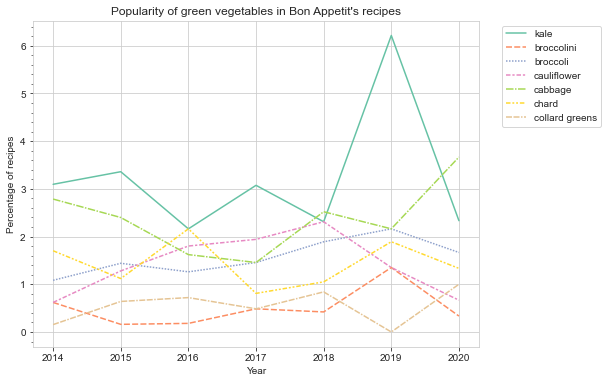

In [14]:
green_veg = ['kale', 'broccolini', 'broccoli', 'cauliflower', 'cabbage', 'chard', 'collard greens']
plot_ingred_trend(ingred_prop, green_veg, 'green vegetables')

Kale, the long-reigning superfood, has quite consistently been featured in more recipes than other green vegetables.

How to conclusively proof that I have plotted all the ingredients related to a category?

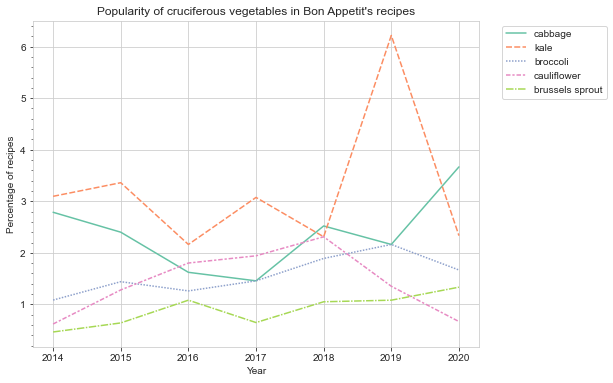

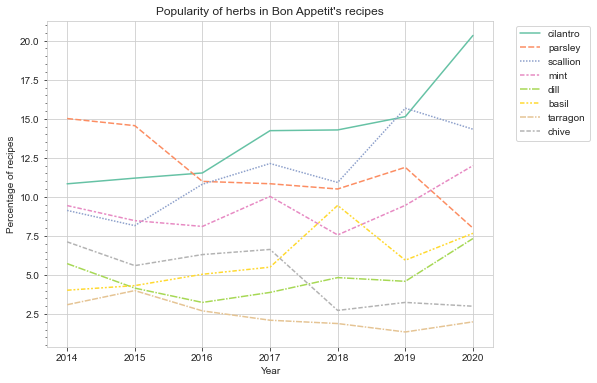

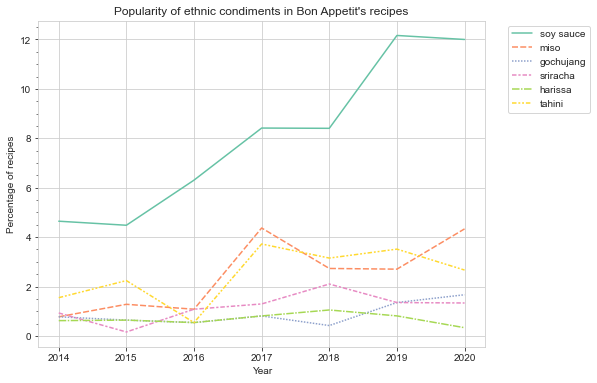

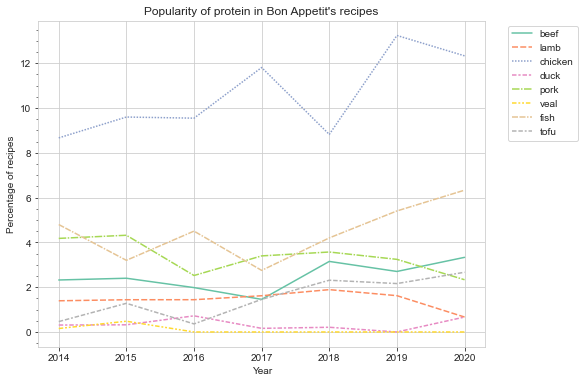

In [116]:
cruciferous = ['cabbage', 'kale', 'broccoli', 'cauliflower', 'brussels sprout']
herbs = ['cilantro', 'parsley', 'scallion', 'mint', 'dill', 'basil', 'tarragon', 'chive']
ethnic_condiments = ['soy sauce', 'miso', 'gochujang', 'sriracha', 'harissa', 'tahini']
protein = ['beef', 'lamb', 'chicken', 'duck', 'pork', 'veal', 'fish', 'tofu']


# save lists to larger dictionary
plot_dict = {'cruciferous vegetables': cruciferous, 'herbs': herbs, 'ethnic condiments': ethnic_condiments, 'protein' : protein}

# write for loop to plot lists of columns that I'm interested in

for key,lst in plot_dict.items():
    plot_ingred_trend(ingred_prop, lst, key)

### Trends in cuisines

To examine which cuisines are trendy or popular, I'll count and compare the number of recipes that have been tagged as a cuisine (e.g. Thai, Persian, Chinese).

Since my current dataframe does not contain binary columns of non-ingredient tags, I have to repeat the process of converting the tags in ingreds column and drop all binary columns created except the cuisine tags.

In [63]:
cuisines = ['thai', 'taiwan',  'chinese', 'korean', 'japanese', 'indian food', 'malaysian food', 'filipino',
            'greek food', 'italian', 'french', 'eastern european/russian',
            'american', 'italian american', 'jewish', 'tex-mex', 'mexican', 'jamaican food',
            'middle eastern', 'persian', 'lebanese']

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

all_dummy = pd.DataFrame(mlb.fit_transform(recipes['tags']), columns=mlb.classes_, index=recipes.index)

# remove unwanted cols (see remove_tags list)

cuisine_dummy = all_dummy[cuisines]

cuisine_dummy = recipes.iloc[:, 0:12].merge(cuisine_dummy, left_index=True, right_index=True)
cuisine_dummy

,title,author,date_x,ingredients,rating,ratings_count,review_count,tags,url,tags_count,...,eastern european/russian,american,italian american,jewish,tex-mex,mexican,jamaican food,middle eastern,persian,lebanese
0,Brussels Sprouts Nasi Goreng,Meera Sodha,2020-11-15,"[2, tbsp. kecap manis or 3 tbsp. agave nectar ...",3.6,26,1,"[basically, brussels sprout, agave, soy sauce,...",https://www.bonappetit.com/recipe/brussels-spr...,15,...,0,0,0,0,0,0,0,0,0,0
1,Huevos Rancheros con Rajas y Champiñones,Rick Martinez,2021-01-03,"[1, serrano chile, 16, oz. cherry tomatoes (ab...",4.6,12,1,"[basically, egg, serrano chiles, cherry tomato...",https://www.bonappetit.com/recipe/huevos-ranch...,13,...,0,0,0,0,0,0,0,0,0,0
2,Green Seasoning Baked Cod,Brigid Washington,2021-01-10,"[¼, vidalia or other sweet onion, 4, 6-oz. ski...",4.2,19,6,"[basically, fish, seafood, onion, cod, kosher ...",https://www.bonappetit.com/recipe/green-season...,18,...,0,0,0,0,0,0,0,0,0,0
3,Black-Eyed Pea Masala With Kale,Rachel Gurjar,2020-12-27,"[1, large white onion, 4, garlic cloves, 1, 1""...",4.5,55,22,"[basically, black-eyed peas, indian food, kale...",https://www.bonappetit.com/recipe/black-eyed-p...,13,...,0,0,0,0,0,0,0,0,0,0
4,Pot Roast Brisket With Harissa and Spices,Sabrina Ghayour,2020-11-22,"[5½, lb. untrimmed flat-cut beef brisket, pref...",4.8,11,3,"[basically, brisket, harissa, kosher salt, cin...",https://www.bonappetit.com/recipe/pot-roast-br...,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4692,Spiced Pear Upside-Down Cake,Claire Saffitz,2015-09-22,"[2, tablespoons unsalted butter, plus more for...",4.2,21,13,"[cake, cardamom, dessert, olive oil, orange, p...",https://www.bonappetit.com/recipe/spiced-pear-...,7,...,0,0,0,0,0,0,0,0,0,0
4693,Double Ginger Sticky Toffee Pudding,Claire Saffitz,2015-09-22,"[cake, ½, cup (1 stick) unsalted butter, room ...",4.8,13,7,"[cake, cream, date, dessert, ginger, pudding, ...",https://www.bonappetit.com/recipe/double-ginge...,7,...,0,0,0,0,0,0,0,0,0,0
4694,Apple Caramels,Rick Martinez,2015-10-29,"[nonstick vegetable oil spray, ½, cup blanched...",4.0,3,2,"[apple, apple cider, brandy, calvados, caramel...",https://www.bonappetit.com/recipe/apple-caramels,8,...,0,0,0,0,0,0,0,0,0,0
4695,"Chicken Skin with Peanuts, Chiles, and Lime","Eli Dahlin, Damn the Weather, Seattle, WA",2015-09-22,"[¼, cup peanut or vegetable oil, 8, garlic clo...",NA,0,0,"[chicken skin, jalapeno, lime, peanut, green o...",https://www.bonappetit.com/recipe/chicken-skin...,7,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# group by year, sum the binary columns, divide it by the number of rows in each group to get the proportion
cuisine_prop = cuisine_dummy.iloc[:, np.r_[2,12:33]].groupby(cuisine_dummy.date_x.dt.year.astype('Int64')).apply(lambda x:(100*x.sum())/len(x))
cuisine_prop
# drop 2012, 2013, 2021 since they only has 8, 53, 62 recipes respectively
#ingred_prop = ingred_prop.drop([2012, 2013, 2021])
#ingred_prop

,thai,taiwan,chinese,korean,japanese,indian food,malaysian food,filipino,greek food,italian,...,eastern european/russian,american,italian american,jewish,tex-mex,mexican,jamaican food,middle eastern,persian,lebanese
date_x,,,,,,,,,,,,,,,,,,,,,
2012,0.000000,0.000000,0.000000,12.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2013,1.886792,0.000000,0.000000,0.000000,13.207547,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2014,2.167183,0.000000,0.309598,2.321981,0.154799,0.154799,0.00000,0.000000,0.154799,2.167183,...,0.773994,0.000000,0.000000,0.464396,0.00,1.702786,0.000000,3.405573,0.000000,0.000000
2015,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.000000,0.000000,0.32,1.120000,0.000000,0.000000,0.000000,0.000000
2016,0.000000,0.000000,0.000000,0.180180,0.180180,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2017,0.000000,1.132686,0.000000,0.161812,0.000000,1.941748,0.00000,0.000000,1.294498,0.000000,...,0.000000,0.161812,0.000000,0.000000,0.00,0.161812,0.000000,0.000000,0.970874,0.000000
2018,0.000000,0.000000,0.000000,0.000000,0.210084,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.420168,0.000000,2.100840,0.000000,0.000000
2019,0.000000,0.000000,0.270270,2.162162,0.000000,1.621622,0.27027,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.540541,0.000000,0.00,0.270270,0.000000,1.891892,0.000000,1.891892
2020,0.333333,0.000000,0.333333,0.000000,0.333333,1.333333,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.333333,0.666667,0.333333,0.333333,0.000000


Looks rather inconclusive.

### Vegetarian and vegan recipes

In 2020, Bon Appetit [set out sustainability goals](https://www.bonappetit.com/story/ba-test-kitchen-sustainability), one of which was to have thirty percent of its new recipes meatless.
I'm also keen to see whether the proportion of vegetarian and vegan recipes have increased over the years.

In [67]:
veg = ['vegetarian', 'vegan']
veg_dummy = all_dummy[veg]

veg_dummy = recipes.iloc[:, 0:12].merge(veg_dummy, left_index=True, right_index=True)
veg_dummy

,title,author,date_x,ingredients,rating,ratings_count,review_count,tags,url,tags_count,ingred_elem_count,tags_in_ingred,vegetarian,vegan
0,Brussels Sprouts Nasi Goreng,Meera Sodha,2020-11-15,"[2, tbsp. kecap manis or 3 tbsp. agave nectar ...",3.6,26,1,"[basically, brussels sprout, agave, soy sauce,...",https://www.bonappetit.com/recipe/brussels-spr...,15,26,"[agave, soy sauce, rice, brussels sprout, red ...",0,0
1,Huevos Rancheros con Rajas y Champiñones,Rick Martinez,2021-01-03,"[1, serrano chile, 16, oz. cherry tomatoes (ab...",4.6,12,1,"[basically, egg, serrano chiles, cherry tomato...",https://www.bonappetit.com/recipe/huevos-ranch...,13,26,"[serrano, chile, cherry tomatoes, onion, cilan...",0,0
2,Green Seasoning Baked Cod,Brigid Washington,2021-01-10,"[¼, vidalia or other sweet onion, 4, 6-oz. ski...",4.2,19,6,"[basically, fish, seafood, onion, cod, kosher ...",https://www.bonappetit.com/recipe/green-season...,18,26,"[onion, cod, kosher salt, black pepper, olive,...",0,0
3,Black-Eyed Pea Masala With Kale,Rachel Gurjar,2020-12-27,"[1, large white onion, 4, garlic cloves, 1, 1""...",4.5,55,22,"[basically, black-eyed peas, indian food, kale...",https://www.bonappetit.com/recipe/black-eyed-p...,13,25,"[onion, garlic, clove, pie, ginger, tuscan, ka...",1,1
4,Pot Roast Brisket With Harissa and Spices,Sabrina Ghayour,2020-11-22,"[5½, lb. untrimmed flat-cut beef brisket, pref...",4.8,11,3,"[basically, brisket, harissa, kosher salt, cin...",https://www.bonappetit.com/recipe/pot-roast-br...,8,15,"[beef, brisket, roll, rose, harissa, kosher sa...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4692,Spiced Pear Upside-Down Cake,Claire Saffitz,2015-09-22,"[2, tablespoons unsalted butter, plus more for...",4.2,21,13,"[cake, cardamom, dessert, olive oil, orange, p...",https://www.bonappetit.com/recipe/spiced-pear-...,7,28,"[butter, flour, orange, juice, pomegranate, mo...",0,0
4693,Double Ginger Sticky Toffee Pudding,Claire Saffitz,2015-09-22,"[cake, ½, cup (1 stick) unsalted butter, room ...",4.8,13,7,"[cake, cream, date, dessert, ginger, pudding, ...",https://www.bonappetit.com/recipe/double-ginge...,7,33,"[cake, butter, flour, medjool, date, soda, kos...",0,0
4694,Apple Caramels,Rick Martinez,2015-10-29,"[nonstick vegetable oil spray, ½, cup blanched...",4.0,3,2,"[apple, apple cider, brandy, calvados, caramel...",https://www.bonappetit.com/recipe/apple-caramels,8,21,"[oil, hazelnut, cinnamon, apple cider, sugar, ...",0,0
4695,"Chicken Skin with Peanuts, Chiles, and Lime","Eli Dahlin, Damn the Weather, Seattle, WA",2015-09-22,"[¼, cup peanut or vegetable oil, 8, garlic clo...",NA,0,0,"[chicken skin, jalapeno, lime, peanut, green o...",https://www.bonappetit.com/recipe/chicken-skin...,7,16,"[peanut, oil, garlic, clove, scallion, green, ...",0,0


In [90]:
veg_dummy.iloc[:, np.r_[2,12,13]].groupby(veg_dummy.date_x.dt.year.astype('Int64')).apply(lambda x:(100*x.sum())/len(x))

,vegetarian,vegan
date_x,,
2012,75.000000,0.000000
2013,3.773585,0.000000
2014,12.848297,0.773994
2015,17.920000,0.160000
2016,13.513514,0.000000
2017,0.647249,0.970874
2018,1.050420,0.420168
2019,3.513514,0.270270
2020,3.333333,3.000000


Perhaps this result is because the meatless recipes are not explicitly tagged as vegetarian or vegan? To uncover more vegetarian/vegan recipes, I could try looking for dropping recipes which contain meat/fish ingredients. A potential limitation of this method is that sweets/dessert recipes increases the proportion of meatless recipes since they usually do not contain any meat/fish.

#### Vegetarian recipes

In [110]:
# drop those rows where the meat/fish ingredients are in the tags_in_ingred column
# or if '1' is recorded in the corresponding dummy column

non_veg = ['meat', 'beef', 'lamb', 'chicken', 'duck', 'oxtail', 'brisket', 'lard',
           'pork', 'sausage', 'ham', 'salami', 'prosciutto', 'bacon', 'pancetta', 'chorizo', 'kielbasa', 'meatloaf', 'veal', 
           'fish', 'trout', 'cod', 'salmon', 'halibut', 'swordfish', 'mahi-mahi', 'mackerel', 'tuna', 'red snapper', 'anchovy',
           'shrimp', 'seafood', 'shellfish', 'crab', 'clam', 'mussel', 'octopus', 'scallop', 'lobster', 'squid']
recipes[(recipes[non_veg] == 1).any(1)].groupby(recipes.date_x.dt.year.astype('Int64')).size()



date_x
2013     20
2014    204
2015    201
2016    179
2017    205
2018    175
2019    129
2020     97
2021     27
dtype: int64

In [111]:
# proportion of recipes containing meat and/or fish for every year
print("Percentage of recipes containing meat and/or seafood in a year:")
((recipes[(recipes[non_veg] == 1).any(1)].groupby(recipes.date_x.dt.year.astype('Int64')).size()).div(recipes.groupby(recipes.date_x.dt.year.astype('Int64')).size())).round(2)

Percentage of recipes containing meat and/or seafood in a year:


date_x
2012     NaN
2013    0.38
2014    0.32
2015    0.32
2016    0.32
2017    0.33
2018    0.37
2019    0.35
2020    0.32
2021    0.44
dtype: float64

Based on the results in 2019 (35%) and 2020 (32%), it looks like the proportion of recipes containing meat has not obviously been reduced by a large margin after the commitment. Since 2021 has just started, it can't be compared yet.

While it looks like recipes containing meat actually make up a smaller than expected proportion of recipes in a year, the total number of recipes also include drinks and desserts.   

Given that it's easy to hit 30% meatless recipes (from the ~60-70% meatless recipes), it calls into question whether Bon Appetit could have been more ambitious with their meatless recipe target.

#### Vegan recipes

The vegan diet is even more restrictive since no animal products are consumed. To look at the proportion of recipes which are vegan, I'll have to add additional products to the non_veg list. A possible limitation of adding the dairy products to the list is that vegan substitutes for dairy products are quite commonly available now and vegan readers can make subs to vegetarian recipes.

In [113]:
non_vegan = ['meat', 'beef', 'lamb', 'chicken', 'duck', 'oxtail', 'brisket', 'lard',
             'pork', 'sausage', 'ham', 'salami', 'prosciutto', 'bacon', 'pancetta', 'chorizo', 'kielbasa', 'meatloaf', 'veal', 
             'fish', 'trout', 'cod', 'salmon', 'halibut', 'swordfish', 'mahi-mahi', 'mackerel', 'tuna', 'red snapper', 'anchovy',
             'shrimp', 'seafood', 'shellfish', 'crab', 'clam', 'mussel', 'octopus', 'scallop', 'lobster', 'squid', 
             'cheese', 'parmesan', 'pecorino', 'ricotta', 'feta', 'queso fresco', 'cotija', 'cheddar', 'provolone', 'gouda', 'gruyere', 'mozzarella', 'burrata', 'goat cheese', 'blue cheese', 
             'yogurt', 'butter', 'egg', 'milk', 'whipped cream',
             'honey', 'worcestershire sauce', 'gelatin']
recipes[(recipes[non_vegan] == 1).any(1)].groupby(recipes.date_x.dt.year.astype('Int64')).size()


date_x
2012      3
2013     34
2014    447
2015    412
2016    397
2017    442
2018    365
2019    290
2020    225
2021     51
dtype: int64

In [114]:
print("Percentage of recipes containing non-vegan ingredients in a year:")
((recipes[(recipes[non_vegan] == 1).any(1)].groupby(recipes.date_x.dt.year.astype('Int64')).size()).div(recipes.groupby(recipes.date_x.dt.year.astype('Int64')).size())).round(2)

Percentage of recipes containing non-vegan ingredients in a year:


date_x
2012    0.38
2013    0.64
2014    0.69
2015    0.66
2016    0.72
2017    0.72
2018    0.77
2019    0.78
2020    0.75
2021    0.82
dtype: float64